<p align="center">
  <img src="logoU.png" alt="Logo Universidad de Antioquia" width="500"/>
</p>

<h1 align="center" style="font-size:2.5em; color:#1b5e20;">
  Proyecto 3: Informática Médica
</h1>

<p align="center" style="font-size:1.2em;">
  <b>Daniel Barrera Mazo</b> <br>
  <b>Isabella Bedoya Orozco</b> <br>
  <b>Juan David Santofimio Rojas</b>
</p>

## Introducción

El presente proyecto tiene como objetivo desarrollar un predictor de Grupos Relacionados por el Diagnóstico (GRD). Es decir, se busca construir un modelo de inteligencia artificial capaz de clasificar los registros de la base de datos de manera comparable al grouper original que realizó la clasificación.

Para lograr esto, se utilizarán todas las variables disponibles en la base de datos, considerando como variable de salida el código GRD (GRD -Código).

En una fase posterior, se construirá una aplicación web (con Django) que permita a un usuario final ingresar las variables predictoras y obtener la etiqueta GRD asignada por el modelo. 

## Carga de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('../data/data.xlsx')
data

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,162762.0,233,Aseguradora_68,23,20-24,F,5088,29122005,URGENCIA,31122005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,162763.0,111,Aseguradora_37,64,60-64,M,5088,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,CIRUGÍA,NaN,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,162764.0,270,Aseguradora_22,8,5-9,f,5887,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,162765.0,6,Aseguradora_57,21,20-24,M,5628,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


In [79]:
# columnas a minusculas, se quitan los espacios, los guiones y las tildes
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('-', '')
data.columns = data.columns.str.replace('ó', 'o')

In [80]:
data.columns

Index(['num_caso', 'aseguradora_codigo', 'aseguradora_descripcion', 'edad',
       'grupo_edad', 'sexo', 'codigo_de_ciudad', 'fecha_de_ingreso',
       'tipo_de_ingreso', 'fecha_de_egreso', 'días_estancia', 'servicioalta',
       'cuidados_intensivos', 'días_de_unidad_cuidado_intensivo',
       'dx_de_ingreso', 'dx_principal_de_egreso_', 'dx_principal_de_egreso_.1',
       'dx_ppal_3_caracteres', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'dxr_5',
       'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa',
       'causa_externa', 'situacion_al_alta', 'proc1', 'proc2', 'proc3',
       'proc4', 'proc5', 'proc6', 'proc7', 'proc8', 'proc9', 'proc10',
       'proc11', 'proc12', 'proc13', 'proc14', 'proc15', 'proc16', 'proc17',
       'proc18', 'proc19', 'proc20', 'proc21', 'proc22', 'proc23', 'proc24',
       'proc25', 'proc26', 'proc27', 'proc28', 'proc29', 'proc30',
       'tipo_servicio', 'causa_basica_de_muerte', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd

## Selección de variables

### Eliminación de columnas innecesarias


**Num caso:** Es un identificador único de cada registro. No aporta información predictiva y puede causar “data leakage” si el modelo lo utiliza como feauture.

**Código de ciudad:** A menos que exista una relación muy fuerte entre ciudad y GRD que se quiere capturar, suelen actuar más como “ruido” dada su alta cardinalidad.

### Columnas duplicadas o derivables

**Aseguradora -Código- y Aseguradora -Descripción-:** Se mantendrá solo el código; la otra es redundante.

**Fecha de ingreso y Fecha de egreso vs. Días estancia:** Ya se tiene Días estancia que es la derivación de ambas fechas; se pueden eliminar las fechas para simplificar.

**GRD -Descripción y Tipo GRD:** Son etiquetas de salida o información de interpretación. Para la predicción, basta GRD -Código. Ambas columnas se eliminan del input.

### Columnas con excesivo missing o irrelevancia clínica

**Causa Basica de muerte:** tiene más de 90% de valores faltantes; se decide descartarla.


## Eliminación inicial de columnas

In [81]:
# columnas a eliminar
delete_columns = ['num_caso', 'aseguradora_descripcion', 'aseguradora_codigo',
       'grupo_edad', 'fecha_de_ingreso',
       'fecha_de_egreso',
       'causa_externa',
       'causa_basica_de_muerte']

data.drop(delete_columns, axis=1, inplace=True)
data

,edad,sexo,codigo_de_ciudad,tipo_de_ingreso,días_estancia,servicioalta,cuidados_intensivos,días_de_unidad_cuidado_intensivo,dx_de_ingreso,dx_principal_de_egreso_,...,proc27,proc28,proc29,proc30,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo,grd_descripcion,tipo_grd
0,38,F,5001,URGENCIA,20,29,NO,0,2,I635,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,27,M,5088,URGENCIA,30,156,NO,0,2,B232,...,NaN,NaN,NaN,NaN,NO APLICA,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,39,M,5001,URGENCIA,21,39,NO,0,2,B227,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,24,M,5001,URGENCIA,2,20,NO,0,2,B208,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,60,M,5001,URGENCIA,44,24,NO,0,2,T814,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,5088,URGENCIA,2,297,NO,0,2,J018,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,64,M,5088,URGENCIA,1,42,SI,1,2,I743,...,NaN,NaN,NaN,NaN,CIRUGÍA,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,8,f,5887,URGENCIA,1,28,NO,0,2,S008,...,NaN,NaN,NaN,NaN,NO APLICA,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,21,M,5628,URGENCIA,1,24,NO,0,2,S681,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


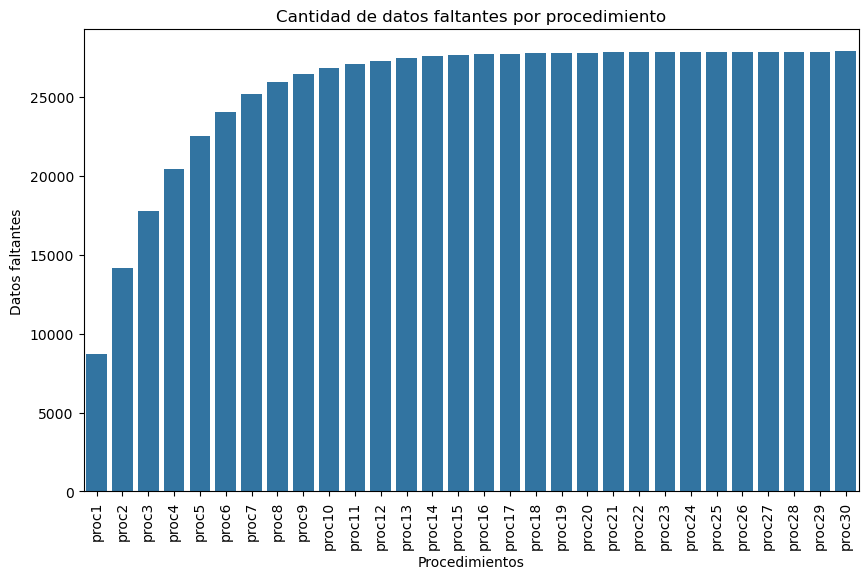

In [82]:
columns = ['proc1', 'proc2', 'proc3',
       'proc4', 'proc5', 'proc6', 'proc7', 'proc8', 'proc9', 'proc10',
       'proc11', 'proc12', 'proc13', 'proc14', 'proc15', 'proc16', 'proc17',
       'proc18', 'proc19', 'proc20', 'proc21', 'proc22', 'proc23', 'proc24',
       'proc25', 'proc26', 'proc27', 'proc28', 'proc29', 'proc30']

# datos faltantes
data_nan = data[columns].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=data_nan.index, y=data_nan.values)
plt.xticks(rotation=90)
plt.title('Cantidad de datos faltantes por procedimiento')
plt.xlabel('Procedimientos')
plt.ylabel('Datos faltantes')
plt.show()

En la base de datos original se cuenta con hasta 30 columnas de procedimientos realizados a cada paciente. Sin embargo, se observa que la gran mayoría de estos procedimientos presentan un alto porcentaje de datos faltantes, como se evidencia en el gráfico anterior. Por esta razón, y siguiendo recomendaciones de la literatura, se opta por conservar únicamente el primer procedimiento (proc1), ya que suele corresponder al procedimiento principal o más relevante durante la estancia hospitalaria. Además, los procedimientos secundarios tienden a aportar información redundante o poco significativa para la predicción en muchos casos clínicos.

Esta decisión se alinea con lo planteado por Verma et al. (2017), quienes señalan que el procedimiento principal tiene un papel central en la clasificación de los Grupos Relacionados por el Diagnóstico (GRD), y que una codificación inadecuada puede afectar negativamente los sistemas de clasificación y reembolso hospitalario. Incluir procedimientos secundarios con alta proporción de valores nulos puede introducir ruido y afectar el desempeño de los modelos predictivos. (Verma et al., 2017).

**Referencia:**  
Verma, A., Murray, J., & Greaves, F. (2017). The impact of procedure coding on case-mix classification and hospital reimbursement: a systematic review. *Health Policy*, 121(9), 1001-1008. https://doi.org/10.1016/j.healthpol.2017.07.003

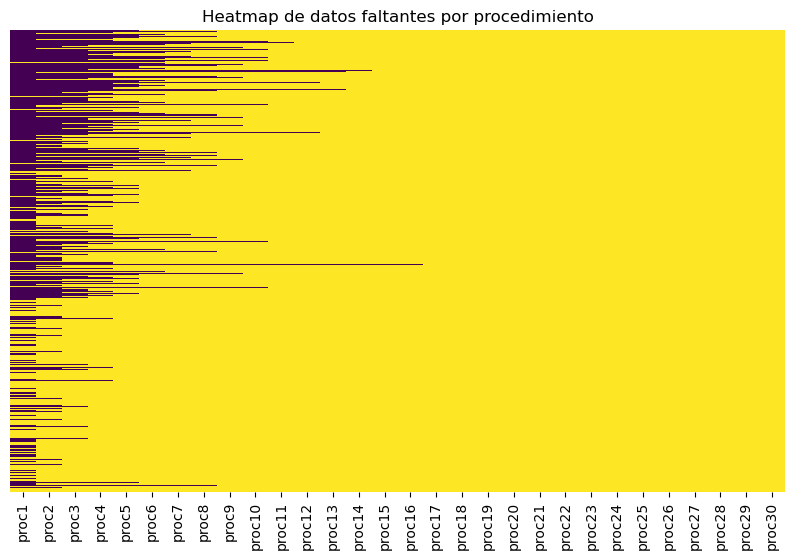

In [83]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[columns].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heatmap de datos faltantes por procedimiento')
plt.show()

El heatmap de datos faltantes por procedimiento permite visualizar de manera clara la distribución de los valores nulos en las columnas de procedimientos. Se observa que, a partir del segundo procedimiento, la cantidad de datos faltantes aumenta drásticamente, hasta el punto de que la mayoría de las columnas posteriores contienen casi exclusivamente valores nulos. Esto confirma que solo el primer procedimiento (`proc1`) tiene una cobertura significativa en la base de datos, reforzando la decisión de conservar únicamente esta variable para el análisis y modelado.

In [84]:
# columnas a eliminar
delete_columns = ['proc2', 'proc3',
       'proc4', 'proc5', 'proc6', 'proc7', 'proc8', 'proc9', 'proc10',
       'proc11', 'proc12', 'proc13', 'proc14', 'proc15', 'proc16', 'proc17',
       'proc18', 'proc19', 'proc20', 'proc21', 'proc22', 'proc23', 'proc24',
       'proc25', 'proc26', 'proc27', 'proc28', 'proc29', 'proc30']

data.drop(delete_columns, axis=1, inplace=True)
data

,edad,sexo,codigo_de_ciudad,tipo_de_ingreso,días_estancia,servicioalta,cuidados_intensivos,días_de_unidad_cuidado_intensivo,dx_de_ingreso,dx_principal_de_egreso_,...,dxr_10_,codigo_causa_externa,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo,grd_descripcion,tipo_grd
0,38,F,5001,URGENCIA,20,29,NO,0,2,I635,...,NaN,NaN,ALTA MEDICA,43.11,URGENCIA ADULTOS,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,27,M,5088,URGENCIA,30,156,NO,0,2,B232,...,NaN,NaN,ALTA MÉDICA,87.44,NO APLICA,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,39,M,5001,URGENCIA,21,39,NO,0,2,B227,...,NaN,NaN,ALTA MÉDICA,38.93,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,24,M,5001,URGENCIA,2,20,NO,0,2,B208,...,NaN,NaN,ALTA MÉDICA,88.01,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,60,M,5001,URGENCIA,44,24,NO,0,2,T814,...,NaN,Y838,ALTA MÉDICA,45.16,URGENCIA ADULTOS,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,5088,URGENCIA,2,297,NO,0,2,J018,...,NaN,NaN,ALTA MÉDICA,NaN,URGENCIA ADULTOS,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,64,M,5088,URGENCIA,1,42,SI,1,2,I743,...,NaN,NaN,FALLECIDO,38.08,CIRUGÍA,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,8,f,5887,URGENCIA,1,28,NO,0,2,S008,...,NaN,V800,ALTA MÉDICA,21.82,NO APLICA,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,21,M,5628,URGENCIA,1,24,NO,0,2,S681,...,NaN,X998,ALTA MEDICA,77.04,URGENCIA ADULTOS,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


In [85]:
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_de_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos',
       'días_de_unidad_cuidado_intensivo', 'dx_de_ingreso',
       'dx_principal_de_egreso_', 'dx_principal_de_egreso_.1',
       'dx_ppal_3_caracteres', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'dxr_5',
       'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27869 entries, 0 to 27868
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   edad                              27869 non-null  int64  
 1   sexo                              27869 non-null  object 
 2   codigo_de_ciudad                  27869 non-null  int64  
 3   tipo_de_ingreso                   27869 non-null  object 
 4   días_estancia                     27869 non-null  int64  
 5   servicioalta                      27869 non-null  int64  
 6   cuidados_intensivos               27869 non-null  object 
 7   días_de_unidad_cuidado_intensivo  27869 non-null  int64  
 8   dx_de_ingreso                     27869 non-null  int64  
 9   dx_principal_de_egreso_           27869 non-null  object 
 10  dx_principal_de_egreso_.1         27869 non-null  object 
 11  dx_ppal_3_caracteres              27869 non-null  object 
 12  dxr_

In [87]:
data.rename(columns={
    'dx_principal_de_egreso_.1': 'dx_principal_egreso',
    'días_de_unidad_cuidado_intensivo': 'dias_uci',
    'tipo_de_ingreso': 'tipo_ingreso'
}, inplace=True)

In [88]:
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_de_egreso_', 'dx_principal_egreso',
       'dx_ppal_3_caracteres', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'dxr_5',
       'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

En cuanto a los diagnósticos relacionados (DRX), la base de datos incluye múltiples columnas (por ejemplo, `dxr_1` a `dxr_10`). Sin embargo, se observa que a partir del quinto diagnóstico (`dxr_5`) la cantidad de datos faltantes aumenta considerablemente, lo que reduce su utilidad para el modelado y puede introducir sesgos o ruido en el análisis. Por esta razón, se decide conservar únicamente los primeros cuatro diagnósticos, que son los que presentan mayor cobertura y relevancia clínica, eliminando el resto.

De manera similar, la columna de código de causa externa presenta un alto porcentaje de valores nulos y, según la literatura, el uso de variables con tantos datos faltantes puede afectar negativamente el desempeño y la interpretabilidad de los modelos predictivos, especialmente si no aportan información esencial para la tarea de clasificación (Saar-Tsechansky & Provost, 2007).

**Referencias:**  
- Saar-Tsechansky, M., & Provost, F. (2007). Handling missing values when applying classification models. *Journal of Machine Learning Research*, 8, 1625-1657.  
- Goldstein, B. A., Navar, A. M., Pencina, M. J., & Ioannidis, J. P. (2017). Opportunities and challenges in developing risk prediction models with electronic health records data: a systematic review. *Journal of the American Medical Informatics Association*, 24(1), 198-208. https://doi.org/10.1093/jamia/ocw042

In [ ]:
delete_columns = ['dxr_5', 'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa']

data.drop(delete_columns, axis=1, inplace=True)
data

,edad,sexo,codigo_de_ciudad,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_de_egreso_,...,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo,grd_descripcion,tipo_grd
0,38,F,5001,URGENCIA,20,29,NO,0,2,I635,...,C787,C788,ALTA MEDICA,43.11,URGENCIA ADULTOS,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,27,M,5088,URGENCIA,30,156,NO,0,2,B232,...,B162,A530,ALTA MÉDICA,87.44,NO APLICA,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,39,M,5001,URGENCIA,21,39,NO,0,2,B227,...,B588,D70,ALTA MÉDICA,38.93,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,24,M,5001,URGENCIA,2,20,NO,0,2,B208,...,A600,N518,ALTA MÉDICA,88.01,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,60,M,5001,URGENCIA,44,24,NO,0,2,T814,...,N390,B961,ALTA MÉDICA,45.16,URGENCIA ADULTOS,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,5088,URGENCIA,2,297,NO,0,2,J018,...,NaN,NaN,ALTA MÉDICA,NaN,URGENCIA ADULTOS,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,64,M,5088,URGENCIA,1,42,SI,1,2,I743,...,R100,NaN,FALLECIDO,38.08,CIRUGÍA,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,8,f,5887,URGENCIA,1,28,NO,0,2,S008,...,S0250,NaN,ALTA MÉDICA,21.82,NO APLICA,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,21,M,5628,URGENCIA,1,24,NO,0,2,S681,...,S6270,S661,ALTA MEDICA,77.04,URGENCIA ADULTOS,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


In [ ]:
columns_dx = ['dx_principal_de_egreso_', 'dx_ppal_3_caracteres']

data.drop(columns_dx, axis=1, inplace=True)
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [ ]:
data.cuidados_intensivos.value_counts()

cuidados_intensivos
NO    26681
SI     1182
no        3
Si        1
No        1
si        1
Name: count, dtype: int64

In [ ]:
# se juntan los pacientes una misma distinción de sexo correspondiente
data.sexo.replace({'f': 'F'}, inplace=True)
data.sexo.replace({'m': 'M'}, inplace=True)
# similarmente se juntan los pacientes en un mismo tipo de ingreso correspondiente
data.tipo_ingreso.replace({'urgencias': 'URGENCIA'}, inplace=True)
data.tipo_ingreso.replace({'Urgencias': 'URGENCIA'}, inplace=True)
data.tipo_ingreso.replace({'Programado': 'PROGRAMADO'}, inplace=True)
# cuidados intensivos
data.cuidados_intensivos.replace({'si': 'SI'}, inplace=True)
data.cuidados_intensivos.replace({'no': 'NO'}, inplace=True)
data.cuidados_intensivos.replace({'Si': 'SI'}, inplace=True)
data.cuidados_intensivos.replace({'No': 'NO'}, inplace=True)

In [ ]:
data.cuidados_intensivos.value_counts()

cuidados_intensivos
NO    26685
SI     1184
Name: count, dtype: int64

In [ ]:
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [ ]:
columns = ['grd_descripcion', 'tipo_grd']

data.drop(columns, axis=1, inplace=True)
data.columns


Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo'],
      dtype='object')

In [ ]:
data.infeccion_quirurgica.value_counts()

infeccion_quirurgica
NO    27663
SI      204
Si        1
si        1
Name: count, dtype: int64

In [ ]:
data.infecciones.replace({'si': 'SI'}, inplace=True)
data.infecciones.replace({'no': 'NO'}, inplace=True)

data.infeccion_quirurgica.replace({'si': 'SI'}, inplace=True)
data.infeccion_quirurgica.replace({'Si': 'SI'}, inplace=True)


In [ ]:
data.situacion_al_alta.value_counts()

situacion_al_alta
ALTA MÉDICA    26366
FALLECIDO       1492
ALTA MEDICA        7
Muerto             1
Fallecido          1
fallecido          1
Name: count, dtype: int64

In [ ]:
data.situacion_al_alta.replace({'ALTA MEDICA': 'ALTA MÉDICA'}, inplace=True)
data.situacion_al_alta.replace({'Fallecido': 'FALLECIDO'}, inplace=True)
data.situacion_al_alta.replace({'fallecido': 'FALLECIDO'}, inplace=True)
data.situacion_al_alta.replace({'Muerto': 'FALLECIDO'}, inplace=True)

data.situacion_al_alta.value_counts()

situacion_al_alta
ALTA MÉDICA    26373
FALLECIDO       1495
Name: count, dtype: int64

In [ ]:
data.drop(columns=['codigo_de_ciudad'], inplace=True)
data.columns

Index(['edad', 'sexo', 'tipo_ingreso', 'días_estancia', 'servicioalta',
       'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo'],
      dtype='object')

In [ ]:
data.edad.value_counts()

edad
81     592
77     586
68     555
76     551
75     540
      ... 
106      2
102      2
105      1
109      1
104      1
Name: count, Length: 108, dtype: int64

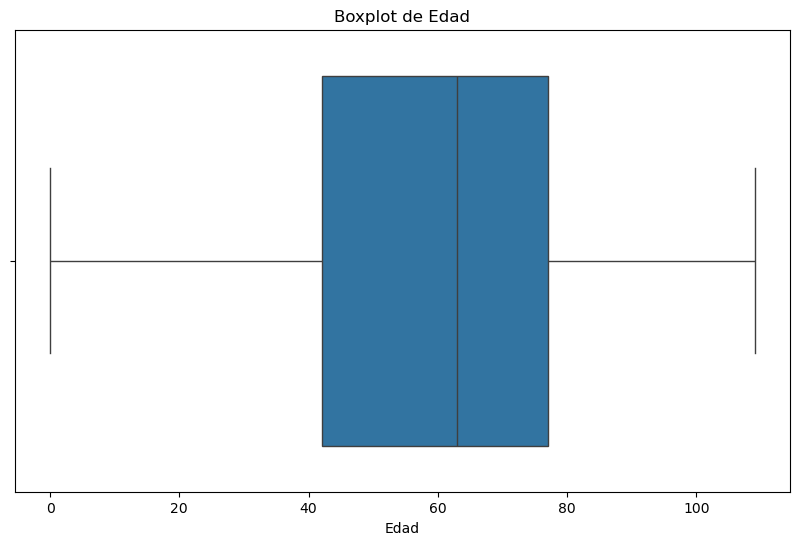

In [ ]:
# boxplot de edad
plt.figure(figsize=(10, 6))
sns.boxplot(x=data.edad)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

El boxplot de la variable Edad muestra una distribución asimétrica hacia la izquierda, con una mediana ubicada alrededor de los 65 años, lo que indica que la mayoría de los pacientes pertenecen a un grupo etario adulto o adulto mayor. No se observan valores atípicos, por lo que no hay necesidad de eliminar registros extremos. El rango intercuartílico es amplio, evidenciando una alta dispersión en las edades registradas. Dada su variabilidad y relevancia clínica, se considera que la variable Edad aporta información valiosa para la predicción del GRD, por lo que será conservada en el modelo.


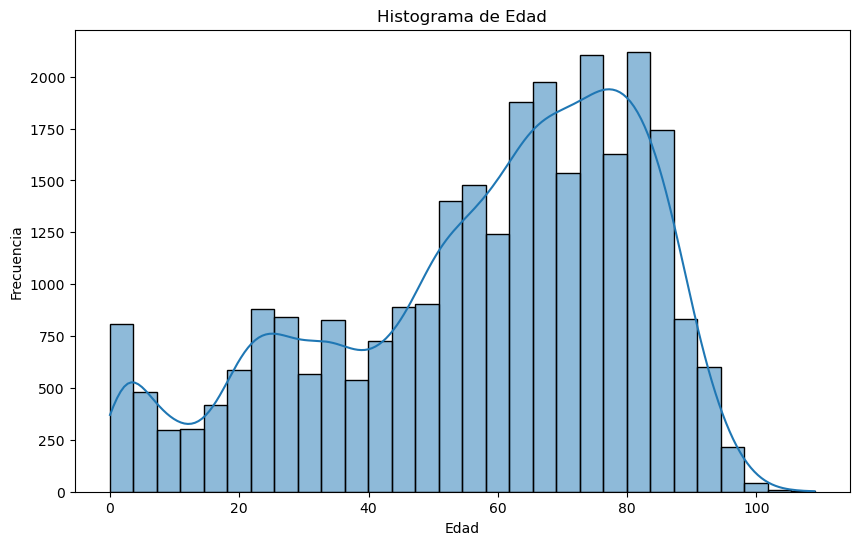

In [ ]:
# histograma de edad
plt.figure(figsize=(10, 6))
sns.histplot(data.edad, bins=30, kde=True)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

El histograma de la variable Edad muestra una mayor concentración de pacientes entre los 60 y 80 años, confirmando el predominio de adultos mayores en la base de datos. Se observan también frecuencias menores en edades extremas, tanto en menores de 5 años como en mayores de 95, aunque estas representan una proporción reducida del total y no constituyen outliers severos. Estas edades extremas se mantendrán, ya que corresponden a posibles casos reales dentro del contexto clínico.


# Preprocesamiento y codificación

In [ ]:
data_process = data.copy()
data_process

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,F,URGENCIA,20,29,NO,0,2,I63,I652,C189,C787,C788,ALTA MÉDICA,43.11,URGENCIA ADULTOS,NO,NO,14143
1,27,M,URGENCIA,30,156,NO,0,2,B23,B210,B204,B162,A530,ALTA MÉDICA,87.44,NO APLICA,NO,NO,184153
2,39,M,URGENCIA,21,39,NO,0,2,B22,B451,G052,B588,D70,ALTA MÉDICA,38.93,URGENCIA ADULTOS,NO,NO,184153
3,24,M,URGENCIA,2,20,NO,0,2,B20,B200,B210,A600,N518,ALTA MÉDICA,88.01,URGENCIA ADULTOS,NO,NO,184153
4,60,M,URGENCIA,44,24,NO,0,2,T81,Y838,C140,N390,B961,ALTA MÉDICA,45.16,URGENCIA ADULTOS,NO,NO,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,URGENCIA,2,297,NO,0,2,J01,R509,NaN,NaN,NaN,ALTA MÉDICA,NaN,URGENCIA ADULTOS,NO,NO,34131
27865,64,M,URGENCIA,1,42,SI,1,2,I74,K658,K261,R100,NaN,FALLECIDO,38.08,CIRUGÍA,NO,NO,61203
27866,8,F,URGENCIA,1,28,NO,0,2,S00,V8009,S0240,S0250,NaN,ALTA MÉDICA,21.82,NO APLICA,NO,NO,31202
27867,21,M,URGENCIA,1,24,NO,0,2,S68,X9988,S6260,S6270,S661,ALTA MÉDICA,77.04,URGENCIA ADULTOS,NO,NO,91301


Se hace codificación binaria en las variables categoricas con dos clases

In [ ]:
data.tipo_ingreso.value_counts()

tipo_ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64

In [ ]:
# codificacion binaria
data_process['sexo'] = data_process['sexo'].map({'F': 0, 'M': 1})
data_process['tipo_ingreso'] = data_process['tipo_ingreso'].map({'URGENCIA': 0, 'PROGRAMADO': 1})
data_process['cuidados_intensivos'] = data_process['cuidados_intensivos'].map({'SI': 1, 'NO': 0})
data_process['infeccion_quirurgica'] = data_process['infeccion_quirurgica'].map({'SI': 1, 'NO': 0})
data_process['infecciones'] = data_process['infecciones'].map({'SI': 1, 'NO': 0})
data_process['situacion_al_alta'] = data_process['situacion_al_alta'].map({'ALTA MÉDICA': 1, 'FALLECIDO': 0})

data_process

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,0,0,20,29,0,0,2,I63,I652,C189,C787,C788,1.0,43.11,URGENCIA ADULTOS,0,0,14143
1,27,1,0,30,156,0,0,2,B23,B210,B204,B162,A530,1.0,87.44,NO APLICA,0,0,184153
2,39,1,0,21,39,0,0,2,B22,B451,G052,B588,D70,1.0,38.93,URGENCIA ADULTOS,0,0,184153
3,24,1,0,2,20,0,0,2,B20,B200,B210,A600,N518,1.0,88.01,URGENCIA ADULTOS,0,0,184153
4,60,1,0,44,24,0,0,2,T81,Y838,C140,N390,B961,1.0,45.16,URGENCIA ADULTOS,0,0,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,0,0,2,297,0,0,2,J01,R509,NaN,NaN,NaN,1.0,NaN,URGENCIA ADULTOS,0,0,34131
27865,64,1,0,1,42,1,1,2,I74,K658,K261,R100,NaN,0.0,38.08,CIRUGÍA,0,0,61203
27866,8,0,0,1,28,0,0,2,S00,V8009,S0240,S0250,NaN,1.0,21.82,NO APLICA,0,0,31202
27867,21,1,0,1,24,0,0,2,S68,X9988,S6260,S6270,S661,1.0,77.04,URGENCIA ADULTOS,0,0,91301


In [ ]:
data_process.tipo_servicio.value_counts()

tipo_servicio
URGENCIA ADULTOS        24836
NO APLICA                2348
URGENCIA PEDÍATRICAS      367
CIRUGÍA                   308
U. ADULTOS                  1
URGENCIA ADULTO             1
URGENCIA ADULTOS.           1
URGENCIA - ADULTOS          1
No aplica                   1
N0 APLICA                   1
CIRUGIA                     1
URGENCIA PEDIATRICAS        1
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64

In [ ]:
data_process.tipo_servicio.unique()

array(['URGENCIA ADULTOS', 'NO APLICA', 'CIRUGÍA', 'URGENCIA PEDÍATRICAS',
       'U. ADULTOS', 'URGENCIA ADULTO', 'URGENCIA ADULTOS.',
       'URGENCIA - ADULTOS', nan, 'No aplica', 'N0 APLICA', 'CIRUGIA',
       'URGENCIA PEDIATRICAS', 'ATENCIÓN PRIORITARIA'], dtype=object)

In [ ]:
data_process.tipo_servicio.replace({'U. ADULTOS': 'URGENCIA ADULTOS'}, inplace=True)
data_process.tipo_servicio.replace({'URGENCIA ADULTO': 'URGENCIA ADULTOS'}, inplace=True)
data_process.tipo_servicio.replace({'URGENCIA ADULTOS.': 'URGENCIA ADULTOS'}, inplace=True)
data_process.tipo_servicio.replace({'URGENCIA - ADULTOS': 'URGENCIA ADULTOS'}, inplace=True)

data_process.tipo_servicio.replace({'URGENCIA PEDÍATRICAS': 'URGENCIA PEDIATRICAS'}, inplace=True)
data_process.tipo_servicio.replace({'CIRUGÍA': 'CIRUGIA'}, inplace=True)

data_process.tipo_servicio.replace({'No aplica': 'NO APLICA'}, inplace=True)
data_process.tipo_servicio.replace({'N0 APLICA': 'NO APLICA'}, inplace=True)

data_process.tipo_servicio.value_counts()



tipo_servicio
URGENCIA ADULTOS        24840
NO APLICA                2350
URGENCIA PEDIATRICAS      368
CIRUGIA                   309
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64

Se eliminó la única fila con el valor **'ATENCIÓN PRIORITARIA'** en la variable `tipo_servicio`, ya que al tratarse de un caso aislado no aporta valor estadístico y podría generar ruido en el modelo. El resto de las categorías presentan una frecuencia suficiente para su análisis.


In [ ]:
# Se elimina la fila con tipo de servicio 'ATENCION PRIORITARIA'
data_process = data_process[data_process.tipo_servicio != 'ATENCIÓN PRIORITARIA']
data_process.tipo_servicio.value_counts()


tipo_servicio
URGENCIA ADULTOS        24840
NO APLICA                2350
URGENCIA PEDIATRICAS      368
CIRUGIA                   309
Name: count, dtype: int64

In [ ]:
data_process

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,0,0,20,29,0,0,2,I63,I652,C189,C787,C788,1.0,43.11,URGENCIA ADULTOS,0,0,14143
1,27,1,0,30,156,0,0,2,B23,B210,B204,B162,A530,1.0,87.44,NO APLICA,0,0,184153
2,39,1,0,21,39,0,0,2,B22,B451,G052,B588,D70,1.0,38.93,URGENCIA ADULTOS,0,0,184153
3,24,1,0,2,20,0,0,2,B20,B200,B210,A600,N518,1.0,88.01,URGENCIA ADULTOS,0,0,184153
4,60,1,0,44,24,0,0,2,T81,Y838,C140,N390,B961,1.0,45.16,URGENCIA ADULTOS,0,0,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,0,0,2,297,0,0,2,J01,R509,NaN,NaN,NaN,1.0,NaN,URGENCIA ADULTOS,0,0,34131
27865,64,1,0,1,42,1,1,2,I74,K658,K261,R100,NaN,0.0,38.08,CIRUGIA,0,0,61203
27866,8,0,0,1,28,0,0,2,S00,V8009,S0240,S0250,NaN,1.0,21.82,NO APLICA,0,0,31202
27867,21,1,0,1,24,0,0,2,S68,X9988,S6260,S6270,S661,1.0,77.04,URGENCIA ADULTOS,0,0,91301


In [ ]:
# save the processed data
data_process.to_csv('data_process.csv', index=False)


In [ ]:
data = pd.read_csv('data_process.csv')
data

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,0,0,20,29,0,0,2,I63,I652,C189,C787,C788,1.0,43.11,URGENCIA ADULTOS,0,0,14143
1,27,1,0,30,156,0,0,2,B23,B210,B204,B162,A530,1.0,87.44,NO APLICA,0,0,184153
2,39,1,0,21,39,0,0,2,B22,B451,G052,B588,D70,1.0,38.93,URGENCIA ADULTOS,0,0,184153
3,24,1,0,2,20,0,0,2,B20,B200,B210,A600,N518,1.0,88.01,URGENCIA ADULTOS,0,0,184153
4,60,1,0,44,24,0,0,2,T81,Y838,C140,N390,B961,1.0,45.16,URGENCIA ADULTOS,0,0,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,23,0,0,2,297,0,0,2,J01,R509,NaN,NaN,NaN,1.0,NaN,URGENCIA ADULTOS,0,0,34131
27864,64,1,0,1,42,1,1,2,I74,K658,K261,R100,NaN,0.0,38.08,CIRUGIA,0,0,61203
27865,8,0,0,1,28,0,0,2,S00,V8009,S0240,S0250,NaN,1.0,21.82,NO APLICA,0,0,31202
27866,21,1,0,1,24,0,0,2,S68,X9988,S6260,S6270,S661,1.0,77.04,URGENCIA ADULTOS,0,0,91301


Se aplicó codificación one-hot a la variable categórica tipo_servicio.

In [ ]:
# one hot en tipo_servicio
data = pd.get_dummies(data, columns=['tipo_servicio'], drop_first=True, dtype=int)
data

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,23,0,0,2,297,0,0,2,J01,R509,...,NaN,NaN,1.0,NaN,0,0,34131,0,1,0
27864,64,1,0,1,42,1,1,2,I74,K658,...,R100,NaN,0.0,38.08,0,0,61203,0,0,0
27865,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,NaN,1.0,21.82,0,0,31202,1,0,0
27866,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


In [ ]:
data.columns

Index(['edad', 'sexo', 'tipo_ingreso', 'días_estancia', 'servicioalta',
       'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'infecciones', 'infeccion_quirurgica',
       'grd_codigo', 'tipo_servicio_NO APLICA',
       'tipo_servicio_URGENCIA ADULTOS', 'tipo_servicio_URGENCIA PEDIATRICAS'],
      dtype='object')

In [ ]:
data['tipo_servicio_NO APLICA'].value_counts()

tipo_servicio_NO APLICA
0    25518
1     2350
Name: count, dtype: int64

In [ ]:
# se llenan los valores nulos de los diagnósticos con 'MISSING'
diagnostics_columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']

for col in diagnostics_columns:
    data[col] = data[col].fillna('MISSING')

data

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,23,0,0,2,297,0,0,2,J01,R509,...,MISSING,MISSING,1.0,NaN,0,0,34131,0,1,0
27864,64,1,0,1,42,1,1,2,I74,K658,...,R100,MISSING,0.0,38.08,0,0,61203,0,0,0
27865,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,MISSING,1.0,21.82,0,0,31202,1,0,0
27866,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


In [ ]:
data['proc1'] = data['proc1'].fillna('MISSING')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27868 entries, 0 to 27867
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   edad                                27868 non-null  int64  
 1   sexo                                27868 non-null  int64  
 2   tipo_ingreso                        27868 non-null  int64  
 3   días_estancia                       27868 non-null  int64  
 4   servicioalta                        27868 non-null  int64  
 5   cuidados_intensivos                 27868 non-null  int64  
 6   dias_uci                            27868 non-null  int64  
 7   dx_de_ingreso                       27868 non-null  int64  
 8   dx_principal_egreso                 27868 non-null  object 
 9   dxr_1                               27868 non-null  object 
 10  dxr_2                               27868 non-null  object 
 11  dxr_3                               27868

In [ ]:
data.situacion_al_alta.isnull().sum()

1

In [ ]:
# elimina paciente con situacion_al_alta nula
data = data[data.situacion_al_alta.notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27867
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   edad                                27867 non-null  int64  
 1   sexo                                27867 non-null  int64  
 2   tipo_ingreso                        27867 non-null  int64  
 3   días_estancia                       27867 non-null  int64  
 4   servicioalta                        27867 non-null  int64  
 5   cuidados_intensivos                 27867 non-null  int64  
 6   dias_uci                            27867 non-null  int64  
 7   dx_de_ingreso                       27867 non-null  int64  
 8   dx_principal_egreso                 27867 non-null  object 
 9   dxr_1                               27867 non-null  object 
 10  dxr_2                               27867 non-null  object 
 11  dxr_3                               27867 non-

In [ ]:
data.situacion_al_alta.value_counts()

situacion_al_alta
1.0    26372
0.0     1495
Name: count, dtype: int64

In [ ]:
data.to_csv('data_cleaned.csv', index=False)


# Entrenamiento

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../data/data_cleaned.csv')
df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,23,0,0,2,297,0,0,2,J01,R509,...,MISSING,MISSING,1.0,MISSING,0,0,34131,0,1,0
27863,64,1,0,1,42,1,1,2,I74,K658,...,R100,MISSING,0.0,38.08,0,0,61203,0,0,0
27864,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,MISSING,1.0,21.82,0,0,31202,1,0,0
27865,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


Dado el alto desbalance en la distribución de clases en los códigos GRD, se tomó la decisión de reagrupar aquellos con menos de 150 muestras bajo una nueva categoría denominada “OTROS”. Esta decisión se basa en el artículo de Tanha et al. (2020), quienes afirman que los problemas de clasificación multiclase desbalanceada son más complejos que los binarios, debido a la coexistencia de múltiples clases minoritarias y mayoritarias, lo que dificulta el aprendizaje efectivo del modelo. Este artículo señala que los algoritmos tradicionales tienden a sesgarse hacia las clases con mayor frecuencia, afectando negativamente la precisión sobre las clases minoritarias. Además, enfatiza que el aprendizaje a partir de datos multiclase desbalanceados, especialmente en grandes volúmenes, es una tarea compleja que puede requerir estrategias como la agrupación de clases poco representadas. Por tanto, esta transformación simplificará el problema de clasificacióny  también mejora la capacidad del modelo para generalizar y desempeñarse de manera más estable.

**Referencia:**

Tanha, J., Abdi, Y., Samadi, N., Razzaghi, N., & Asadpour, M. (2020). Boosting methods for multi-class imbalanced data classification: an experimental review. Journal of Big Data, 7(1), 70. https://doi.org/10.1186/s40537-020-00349-y 

In [4]:
# códigos con menos de 150 repeticiones
counts = df['grd_codigo'].value_counts()
rare_codes = counts[counts < 150].index

# se rellenan como 'OTRO'
df['grd_codigo'] = df['grd_codigo'].apply(lambda x: 'OTRO' if x in rare_codes else x)

df['grd_codigo'].value_counts()

grd_codigo
OTRO      17192
44173       732
114122      691
54123       631
44163       577
114123      433
14221       363
44162       354
114102      291
114131      286
174133      285
44172       264
81801       258
54122       252
114121      246
14263       242
54152       223
54153       208
44153       205
44181       203
44161       203
64181       199
174132      198
114103      192
104102      187
81701       183
64171       178
14222       177
71141       172
44171       172
51153       169
64172       167
81601       164
81201       162
64182       160
14262       159
74113       159
54193       158
61131       158
14231       157
74103       157
64183       150
214123      150
Name: count, dtype: int64

In [5]:
dxr_columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']

for col in dxr_columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str[:3]

df[['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']]

,dxr_1,dxr_2,dxr_3,dxr_4
0,I65,C18,C78,C78
1,B21,B20,B16,A53
2,B45,G05,B58,D70
3,B20,B21,A60,N51
4,Y83,C14,N39,B96
...,...,...,...,...
27862,R50,MIS,MIS,MIS
27863,K65,K26,R10,MIS
27864,V80,S02,S02,MIS
27865,X99,S62,S62,S66


Se agrega una 'X' a todas las variables que, segun el protocolo o codificación empleada al construir el dataset, aparecen como variables numericas, pero realmente son variables categoricas donde no se puede generar una relación de ordinalidad. Entonces al poner una 'X' podemos especificar que la variable sea categorica.

In [6]:
df['servicioalta'] = 'X' + df['servicioalta'].astype(str)
df['dx_de_ingreso'] = 'X' + df['dx_de_ingreso'].astype(str)
df['proc1'] = 'X' + df['proc1'].astype(str)
df['grd_codigo'] = 'X' + df['grd_codigo'].astype(str)

df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,X29,0,0,X2,I63,I65,...,C78,C78,1.0,X43.11,0,0,XOTRO,0,1,0
1,27,1,0,30,X156,0,0,X2,B23,B21,...,B16,A53,1.0,X87.44,0,0,XOTRO,1,0,0
2,39,1,0,21,X39,0,0,X2,B22,B45,...,B58,D70,1.0,X38.93,0,0,XOTRO,0,1,0
3,24,1,0,2,X20,0,0,X2,B20,B20,...,A60,N51,1.0,X88.01,0,0,XOTRO,0,1,0
4,60,1,0,44,X24,0,0,X2,T81,Y83,...,N39,B96,1.0,X45.16,0,0,XOTRO,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,23,0,0,2,X297,0,0,X2,J01,R50,...,MIS,MIS,1.0,XMISSING,0,0,XOTRO,0,1,0
27863,64,1,0,1,X42,1,1,X2,I74,K65,...,R10,MIS,0.0,X38.08,0,0,XOTRO,0,0,0
27864,8,0,0,1,X28,0,0,X2,S00,V80,...,S02,MIS,1.0,X21.82,0,0,XOTRO,1,0,0
27865,21,1,0,1,X24,0,0,X2,S68,X99,...,S62,S66,1.0,X77.04,0,0,XOTRO,0,1,0


La idea es desarrollar un modelo basado en **XGBOOST**. Se ha encontrado que este algoritmo es capaz de procesar de forma eficiente las variables categoricas por si mismo, sin realizar una codificación anterior por parte del usuario. Para esto es necesario que esas variables categoricas que en principio son de tipo '`object`' pasen a tipo '`category`'.

In [7]:
columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'grd_codigo', 'proc1', 'dx_principal_egreso', 'dx_de_ingreso', 'servicioalta']
for col in columns:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27867 entries, 0 to 27866
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   edad                                27867 non-null  int64   
 1   sexo                                27867 non-null  int64   
 2   tipo_ingreso                        27867 non-null  int64   
 3   días_estancia                       27867 non-null  int64   
 4   servicioalta                        27867 non-null  category
 5   cuidados_intensivos                 27867 non-null  int64   
 6   dias_uci                            27867 non-null  int64   
 7   dx_de_ingreso                       27867 non-null  category
 8   dx_principal_egreso                 27867 non-null  category
 9   dxr_1                               27867 non-null  category
 10  dxr_2                               27867 non-null  category
 11  dxr_3                       

In [8]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='grd_codigo')
y = df['grd_codigo']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)

In [11]:
n_clases = len(np.unique(y_encoded))
print(f"Total de clases: {n_clases}")
print('Train sample: ' , (X_train.shape , y_train.shape))
print('Test sample: ' , (X_test.shape , y_test.shape))

Total de clases: 43
Train sample:  ((22293, 20), (22293,))
Test sample:  ((5574, 20), (5574,))


Se inició el entrenamiento utilizando los mismos hiperparámetros empleados en el proyecto anterior, con el objetivo de establecer un punto de partida consistente para la comparación y ajuste del modelo.


In [136]:
params = {
    'booster': 'gbtree', # Usar gradient boosting trees
    'eta': 0.01, # Tasa de aprendizaje
    'max_depth': 5, # Máxima profundidad del árbol
    'colsample_bytree': 0.8, # Porcentaje de muestreo de las columnas
    'objective': 'multi:softprob', # Clasificador multiclase
    'n_estimators': 500, # Número de árboles
    'random_state': 42, # Semilla del generador de números aleatorios
    'enable_categorical':True, # Para que el modelo procese variables categóricas
}

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

print('Train accuracy: ', model.score(X_train, y_train))
print('Test accuracy: ', model.score(X_test, y_test))

[0]	validation_0-mlogloss:3.62290
[1]	validation_0-mlogloss:3.50649
[2]	validation_0-mlogloss:3.40905
[3]	validation_0-mlogloss:3.31943
[4]	validation_0-mlogloss:3.23514
[5]	validation_0-mlogloss:3.15901
[6]	validation_0-mlogloss:3.09175
[7]	validation_0-mlogloss:3.02852
[8]	validation_0-mlogloss:2.96758
[9]	validation_0-mlogloss:2.91131
[10]	validation_0-mlogloss:2.85923
[11]	validation_0-mlogloss:2.80956
[12]	validation_0-mlogloss:2.76399
[13]	validation_0-mlogloss:2.72025
[14]	validation_0-mlogloss:2.67700
[15]	validation_0-mlogloss:2.63483
[16]	validation_0-mlogloss:2.59524
[17]	validation_0-mlogloss:2.55630
[18]	validation_0-mlogloss:2.51814
[19]	validation_0-mlogloss:2.48238
[20]	validation_0-mlogloss:2.44880
[21]	validation_0-mlogloss:2.41669
[22]	validation_0-mlogloss:2.38486
[23]	validation_0-mlogloss:2.35415
[24]	validation_0-mlogloss:2.32586
[25]	validation_0-mlogloss:2.29730
[26]	validation_0-mlogloss:2.27001
[27]	validation_0-mlogloss:2.24259
[28]	validation_0-mlogloss:2.2

Se aplicó una búsqueda en malla (Grid Search) para optimizar los hiperparámetros, evaluando distintas combinaciones de n_estimators, learning_rate, max_depth y colsample_bytree. La mejor configuración encontrada fue: n_estimators=600, learning_rate=0.01, max_depth=3 y colsample_bytree=0.9, con lo cual se obtuvo una ligera mejora en la precisión sobre el conjunto de prueba, alcanzando un 84.98%, lo que indica una mejor generalización del modelo.

In [137]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 0.9],
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    enable_categorical=True,
    tree_method='hist',
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = RandomizedSearchCV(xgb_model,
                                 param_grid,
                                 cv=cv,
                                 scoring="accuracy",
                                 n_iter=20,
                                 verbose=2,
                                 random_state=42)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# mejores parametros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy: ", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  34.3s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  35.6s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  36.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=  24.0s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=  24.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=  23.7s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  48.5s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  50.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  51.0s
[CV] END colsample_bytree=0.7, learn

In [146]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [155]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
best_params = grid_search.best_params_

final_model = XGBClassifier(
    **best_params,
    enable_categorical=True,
    tree_method='hist',
    random_state=42
)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [156]:
# Predicción en test
y_pred_test = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Predicción en train
y_pred_train = final_model.predict(X_train_final)
train_accuracy = accuracy_score(y_train_final, y_pred_train)

# Reporte
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Test - métricas adicionales
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))
print("F1 Score (Test): ", f1_score(y_test, y_pred_test, average='weighted'))
print("Recall Score (Test): ", recall_score(y_test, y_pred_test, average='weighted'))

Train Accuracy:  0.9264887293932937
Test Accuracy:  0.8498385360602799

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.71      0.34      0.46        35
           1       0.60      0.72      0.66        54
           2       0.73      0.42      0.53        38
           3       0.69      0.48      0.56        46
           4       0.69      0.86      0.77       154
           5       0.77      0.58      0.66        83
           6       0.87      0.82      0.84        55
           7       0.83      0.86      0.84        69
           8       0.61      0.67      0.63        30
           9       0.80      0.75      0.77        32
          10       0.54      0.50      0.52        28
          11       0.76      0.68      0.72        47
          12       0.87      0.87      0.87        52
          13       0.87      0.90      0.89        61
          14       0.69      0.46      0.55        39
          15       0.73      0.3

El modelo entrenado con los mejores hiperparámetros encontrados mediante "RandomizedSearchCV" mostró una mejora leve en el rendimiento. El accuracy en el conjunto de prueba fue de 84.98%, y el F1-score ponderado fue de 0.84, lo que indica un buen equilibrio general entre precisión y recall. Aunque el accuracy en entrenamiento fue más alto (92.65%), la diferencia del 7.7% no es extrema, pero sí sugiere que hay un ligero sobreajuste. El modelo funciona muy bien en las clases más comunes, como la 6, 7, 12 y 13, donde el F1-score es alto, pero tiene más dificultad en clases con pocos datos, como la 0, 2 y 15. En general, el modelo mejoró con el ajuste de hiperparámetros y generaliza bien a nuevos datos, aunque todavía hay espacio para mejorar en algunas clases menos representadas.

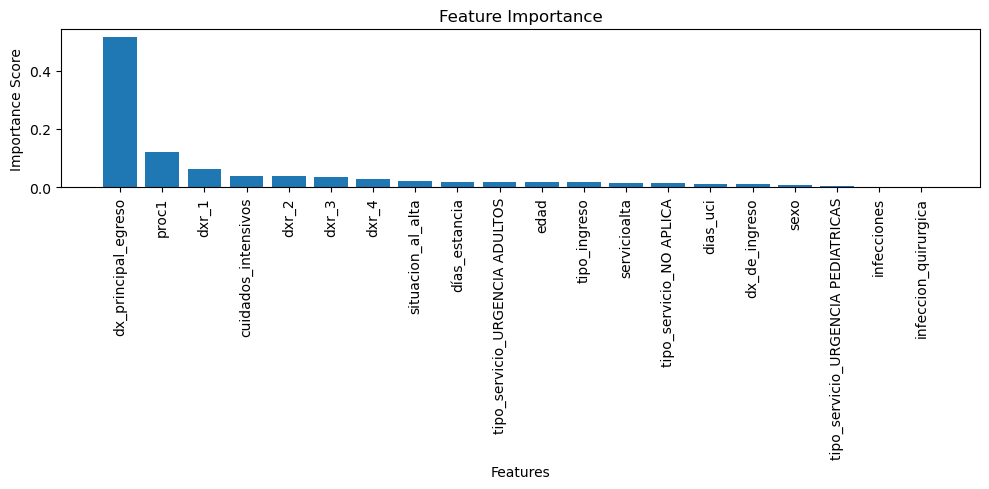

In [161]:
features_importance = final_model.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(features_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(features_importance)), features_importance[sorted_indices], align='center')
plt.xticks(range(len(features_importance)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()

El gráfico de importancia de variables permite identificar cuáles son los factores que más influyen en la predicción del código GRD. La variable más significativa es "dx_principal_egreso", que muestra el mayor nivel de importancia. Esto es esperable, ya que el diagnóstico principal al egreso refleja la condición clínica que motivó la hospitalización y orientó gran parte del manejo médico, siendo también un criterio central en la lógica del agrupador GRD. En segundo lugar aparece "proc1", el procedimiento principal, lo cual también es relevante, ya que algunos GRD se definen no solo por el diagnóstico sino por intervenciones específicas realizadas durante la estancia hospitalaria. Le siguen con menor peso algunos diagnósticos relacionados ("dxr_1", "dxr_2", etc.) y la variable "cuidados_intensivos", lo cual indica que la complejidad del caso también aporta valor en la clasificación.

Otras variables, como "situacion_al_alta", "días_estancia", "edad" y "tipo_ingreso", muestran una contribución moderada, posiblemente asociada a patrones clínicos o administrativos comunes a ciertos grupos diagnósticos. Por otro lado, características como "sexo", "infecciones", "infeccion_quirurgica" y algunas categorías del tipo de servicio tienen una importancia muy baja, lo que indica que no aportan valor predictivo significativo en este modelo.




# Búsqueda de mejores hiperparámetros

Con el objetivo de afinar aún más el rendimiento del modelo, se realizó una búsqueda en malla más detallada (**Grid Search**) ajustando los rangos de los hiperparámetros alrededor de los valores previamente identificados como óptimos. En esta nueva iteración, se evaluaron valores más específicos para explorar el balance entre complejidad del modelo y capacidad de generalización.


In [122]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [570, 600, 630],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [1, 3, 5],
    'colsample_bytree': [1, 0.8, 0.9],
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    enable_categorical=True,
    tree_method='hist',
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = RandomizedSearchCV(xgb_model,
                                 param_grid,
                                 cv=cv,
                                 scoring="accuracy",
                                 n_iter=20,
                                 verbose=2,
                                 random_state=42)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# mejores parametros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy: ", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=570; total time=  32.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=570; total time=  32.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=570; total time=  31.8s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=1, n_estimators=570; total time=  18.4s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=1, n_estimators=570; total time=  18.6s
[CV] END colsample_bytree=1, learning_rate=0.1, max_depth=1, n_estimators=570; total time=  18.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=600; total time=  40.9s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=600; total time=  41.1s
[CV] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=600; total time=  41.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1

In [125]:
y_pred = best_xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)
# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)
# Recall score
recall = recall_score(y_test, y_pred, average='weighted')   
print("Recall Score: ", recall)

Test accuracy:  0.8464298528884104
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.40      0.49        35
           1       0.63      0.69      0.65        54
           2       0.64      0.42      0.51        38
           3       0.79      0.50      0.61        46
           4       0.71      0.85      0.77       154
           5       0.74      0.63      0.68        83
           6       0.82      0.89      0.85        55
           7       0.83      0.90      0.86        69
           8       0.63      0.63      0.63        30
           9       0.76      0.78      0.77        32
          10       0.50      0.46      0.48        28
          11       0.73      0.64      0.68        47
          12       0.83      0.87      0.85        52
          13       0.87      0.87      0.87        61
          14       0.69      0.51      0.59        39
          15       0.73      0.43      0.54        44
          16       0.7

En esta segunda búsqueda más detallada, el modelo alcanzó una precisión en prueba de 84.64%, lo que representa un ligero descenso respecto a la configuración anterior (84.98%). Aunque se mantuvo el mismo número de estimadores y la tasa de aprendizaje se situó en un valor intermedio (learning_rate=0.05), el parámetro "max_depth" se redujo a 1, lo que limita la complejidad de cada árbol. Además, "colsample_bytree" aumentó a 1, utilizando todas las columnas disponibles en cada iteración. Estos cambios probablemente hicieron un modelo más simple, con menor capacidad de capturar relaciones complejas en los datos, lo que podría explicar la leve disminución en el rendimiento.


In [162]:
import joblib

joblib.dump(final_model, 'best_model.pkl')

['best_model.pkl']

In [12]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

# Cargar el modelo guardado
loaded_model = joblib.load('best_model.pkl')

# Realizar predicciones con los datos de test
y_pred_loaded = loaded_model.predict(X_test)

print("Test accuracy:", accuracy_score(y_test, y_pred_loaded))
print("Classification Report:\n", classification_report(y_test, y_pred_loaded))
print("F1 Score:", f1_score(y_test, y_pred_loaded, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_loaded, average='weighted'))

Test accuracy: 0.8498385360602799
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.34      0.46        35
           1       0.60      0.72      0.66        54
           2       0.73      0.42      0.53        38
           3       0.69      0.48      0.56        46
           4       0.69      0.86      0.77       154
           5       0.77      0.58      0.66        83
           6       0.87      0.82      0.84        55
           7       0.83      0.86      0.84        69
           8       0.61      0.67      0.63        30
           9       0.80      0.75      0.77        32
          10       0.54      0.50      0.52        28
          11       0.76      0.68      0.72        47
          12       0.87      0.87      0.87        52
          13       0.87      0.90      0.89        61
          14       0.69      0.46      0.55        39
          15       0.73      0.36      0.48        44
          16       0.81